# Exploring the Weather in Athens


---

>Stogiannidis Ilias Marios <br />
>Department of Informatics  <br />
>Athens University of Economics and Business  <br />
>stoyianel@gmail.com.gr

### Q1: Obtain the Data

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib
import calendar

### Loading data from csv to python 

In [2]:
wdata = pd.read_csv("data.csv")
wdata.head()

,STATION,DATE,PRCP,TAVG
0,GR000016716,1955-01-01,0.0,NaN
1,GR000016716,1955-01-02,2.0,NaN
2,GR000016716,1955-01-03,0.0,NaN
3,GR000016716,1955-01-04,0.0,NaN
4,GR000016716,1955-01-05,0.0,NaN


We know that all data are from the Hellinikon station <br />
so we can drop the station column

In [3]:
wdata = wdata.drop(columns = 'STATION')

Changing date column from strin to datetime for better usage

In [4]:
wdata['DATE']= pd.to_datetime(wdata['DATE'])

Below we see there are missing values in both columns.

In [5]:
wdata['PRCP'].isnull().values.any()

True

In [6]:
wdata['TAVG'].isnull().values.any()

True

Quickly running through the dataset we see there are columns with "---" as values <br />
Because we want these columns to be float in order to use them for mathematical operations <br />
I changed the "---" to an empty cell

In [7]:
hellenic_data = pd.read_csv('athens.csv', names = ['DATE','TAVG','MaxTemp','MinTemp','MeanHum','MaxHum','MinHum','MeanPress','MaxPress','MinPress','PRCP','WindSpeed','WindDir','WindGust'])
hellenic_data['DATE']= pd.to_datetime(hellenic_data['DATE'])
hellenic_data.shape

(3652, 14)

In [8]:
wdata.shape

(23251, 3)

Before doing the merging we can observe that the dataframe has 23251 rows. <br />
Knowing that the rows represent days through the years 1955 to 2020, <br />
we can conclude that there are days that are missing from the dataset <br />
as there should 24107 days. We see that the alternative data are ok since <br />
it has 3652 rows <br />

In [9]:
cdata = pd.merge(wdata,
                   hellenic_data[['DATE','PRCP','TAVG']],
                   on = 'DATE',
                   how = 'outer').sort_values('DATE').set_index('DATE')
cdata = (cdata.reindex(pd.date_range(cdata.index.min(), cdata.index.max(), name='DATE'), fill_value=0)
        .reset_index())
cdata.shape

(24107, 5)

We see that our new dataset has 24107 rows so we can proceed

Filling all NaN values of PRCP_x with the PRCP_y values <br />
and the TAVG_x with those in TAVG_y knowing that \_y names <br />
represent the new values from dataset downloaded from <br />
Hellenic Date Service

In [10]:
cdata['PRCP_x'].fillna(cdata['PRCP_y'], inplace = True)
cdata['TAVG_x'].fillna(cdata['TAVG_y'], inplace = True)

Formating the data as we like

In [11]:
cdata = cdata.rename(columns={'PRCP_x': 'PRCP'})
cdata = cdata.drop(columns = 'PRCP_y')
cdata = cdata.rename(columns={'TAVG_x': 'TAVG'})
cdata = cdata.drop(columns = 'TAVG_y')
cdata

,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
24102,2020-12-27,0.0,16.6
24103,2020-12-28,6.6,14.8
24104,2020-12-29,0.0,16.3
24105,2020-12-30,0.0,16.4


### Q2: Deviation of Summer Temperatures

Mapping each month with a season

In [12]:
cdata['DATE'] = pd.to_datetime(cdata['DATE'])
data_seasons = (cdata['DATE'].dt.month%12 + 3)//3
seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}
cdata['season_name'] = data_seasons.map(seasons)
cdata[cdata['season_name'] == 'Summer']

,DATE,PRCP,TAVG,season_name
151,1955-06-01,0.0,NaN,Summer
152,1955-06-02,0.0,NaN,Summer
153,1955-06-03,0.0,NaN,Summer
154,1955-06-04,0.0,NaN,Summer
155,1955-06-05,0.0,NaN,Summer
...,...,...,...,...
23980,2020-08-27,0.0,28.3,Summer
23981,2020-08-28,0.0,29.5,Summer
23982,2020-08-29,0.0,29.3,Summer
23983,2020-08-30,0.0,27.8,Summer


Collecting data for all summers between 1974 and 1999

In [13]:
summer_temp = cdata[(cdata['season_name'] == 'Summer') & (cdata ['DATE'].dt.year >= 1974) 
                    & (cdata ['DATE'].dt.year <= 1999) ]
summer_temp.head()

,DATE,PRCP,TAVG,season_name
7091,1974-06-01,0.0,22.7,Summer
7092,1974-06-02,0.0,23.2,Summer
7093,1974-06-03,0.2,22.2,Summer
7094,1974-06-04,2.5,21.0,Summer
7095,1974-06-05,0.0,24.0,Summer


Calculating the deviation of air temperature from the average temperature of summers trough the year

In [14]:
summer_temp['MEAN_DEV'] = summer_temp['TAVG']- summer_temp['TAVG'].mean()
summer_temp['YEAR'] = summer_temp['DATE'].dt.year
summer_temp['YEARLY_AVG'] = summer_temp.groupby(['YEAR'])['TAVG'].transform(sum)
summer_temp['YEARLY_AVG'] /= 92
summer_temp.head()

,DATE,PRCP,TAVG,season_name,MEAN_DEV,YEAR,YEARLY_AVG
7091,1974-06-01,0.0,22.7,Summer,-3.532146,1974,24.783696
7092,1974-06-02,0.0,23.2,Summer,-3.032146,1974,24.783696
7093,1974-06-03,0.2,22.2,Summer,-4.032146,1974,24.783696
7094,1974-06-04,2.5,21.0,Summer,-5.232146,1974,24.783696
7095,1974-06-05,0.0,24.0,Summer,-2.232146,1974,24.783696


Calculating the rolling average of the deviation calculated above

In [15]:
summer_by_dt = summer_temp[['YEAR','YEARLY_AVG']].copy()
summer_by_dt.drop_duplicates(keep='first',inplace=True)
summer_by_dt['MEAN_DEV'] = summer_by_dt['YEARLY_AVG'] - summer_temp['TAVG'].mean()
summer_by_dt.drop(columns = 'YEARLY_AVG', inplace = True)
summer_by_dt['ROLLING_AVG'] = summer_by_dt["MEAN_DEV"].rolling(10,min_periods=1).mean()


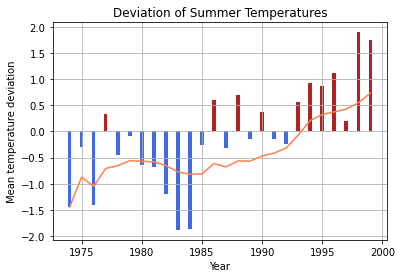

In [16]:
plt.grid()
plt.bar(summer_by_dt.YEAR,summer_by_dt.MEAN_DEV,color = (summer_by_dt.MEAN_DEV > 0).map({True: 'firebrick',
                                                    False: 'royalblue'}),width=0.3)

plt.plot(summer_by_dt.YEAR,summer_by_dt.ROLLING_AVG, color = 'coral')                                             
plt.xlabel("Year")
plt.ylabel("Mean temperature deviation")
plt.title("Deviation of Summer Temperatures")

plt.show()

We can notice that as we look back to previous years summer temperature is colder than the average, <br />
and as we progress through the years the temperature is increasing

### Q3: Evolution of Daily Temperatures

Collectin the average temperate for each year for the full period from 1955 to 2020 and <br />
calculate the 30 day rolling average

In [17]:

temp = cdata[["DATE","TAVG"]].copy()
temp["YEAR"] = temp["DATE"].dt.year
temp["RAVG"] = temp["TAVG"].rolling(30,min_periods = 1).mean()


Calculating the average daily temperature of every day 

In [18]:
dailyy = cdata[(cdata ['DATE'].dt.year >= 1974) 
                    & (cdata ['DATE'].dt.year <= 1999)].copy()
dailyy.drop(columns="season_name", inplace=True)

Calculating mean air temperature for every day of the year <br />
and its rolling average based on years between 1974 and 1999.

In [19]:
data = dailyy.groupby(dailyy.DATE.astype(str).str[5:])['TAVG'].mean().copy()
ddata = pd.DataFrame(data)
ddata.reset_index(inplace=True)
ddata["RAVG"] = ddata["TAVG"].rolling(10, min_periods=1).mean()

Creating a column month in order to use in plot creation

In [20]:
ddata["Month"] = ddata.DATE.str[:2].str.lstrip('0')
ddata["Month"] = ddata["Month"].astype(int)

Creating DM column in order to use it for the mapping <br />
DM stands fro day-month

In [21]:
dailyy["DM"]  = dailyy.DATE.astype(str).str[5:]
temp["DM"]  = temp.DATE.astype(str).str[5:]

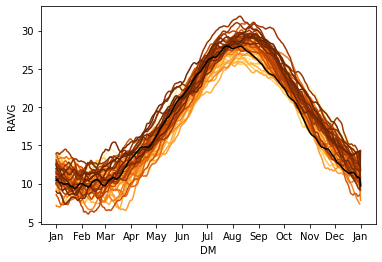

In [22]:
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter

sns.lineplot(
    x="DM",
    y='RAVG',
    hue=temp['DATE'].dt.year,
    palette=sns.color_palette("YlOrBr", as_cmap=True),
    data= temp,
    ci=None,
    legend=None)


sns.lineplot(
    x="DATE",
    y= 'RAVG',
    color = 'black',
    data= ddata,
    ci=None,
    legend=None)

ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.show()

Looking at the graph we can notice that the air temperature rises in spring and summer and falls in fall and  winther 

### Q4: Extreme Temperature Events

Finding the devation of extreme heat events of the baseline

In [23]:
dailyy['DEV'] = ((dailyy.TAVG - dailyy.DM.map(ddata.set_index('DATE').TAVG))/dailyy.DM.map(ddata.set_index('DATE').TAVG))

Counting all those who are above 10%

In [24]:
baseline = dailyy[dailyy["DEV"]>0.1].groupby(dailyy["DATE"].dt.year).agg('count')
baseline.drop(columns={"DATE","PRCP","DM","TAVG"},inplace=True)


Calculatinng yearly percentage 

In [25]:
baseline.reset_index(inplace = True)
baseline["IsLeap"] = baseline["DATE"].apply(calendar.isleap)
baseline['perc'] = np.where(baseline['IsLeap'], baseline['DEV']/366, baseline['DEV']/365)

Calculating the mean extreme heat events percentage of the baseline 

In [26]:
baseline_percent = baseline.perc.mean()
baseline_percent

0.24845192235715483

Now applying the methods used above to calculate the extreme heat events for all years in our data

In [27]:
cdata["DM"]  = cdata.DATE.astype(str).str[5:]
cdata['DEV'] = ((cdata.TAVG - cdata.DM.map(ddata.set_index('DATE').TAVG))/cdata.DM.map(ddata.set_index('DATE').TAVG))

In [28]:
percentages = cdata[cdata["DEV"]>0.1].groupby(cdata["DATE"].dt.year).agg('count')
percentages.drop(columns={"DATE","DM"},inplace=True)

percentages.reset_index(inplace = True)
percentages["IsLeap"] = percentages["DATE"].apply(calendar.isleap)
percentages['perc'] = np.where(percentages['IsLeap'], percentages['DEV']/366, percentages['DEV']/365)


Plotting the data

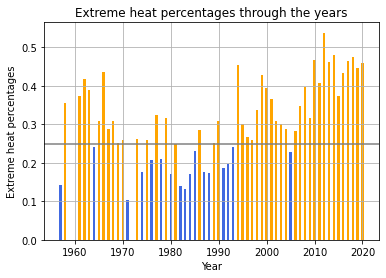

In [29]:
plt.grid()
plt.bar(percentages.DATE,percentages.perc,color = (percentages.perc > baseline_percent).map({True: 'orange',
                                                    False: 'royalblue'}),width = 0.5)
plt.axhline(y = baseline_percent, color = 'grey', linestyle = '-')
plt.xlabel("Year")
plt.ylabel("Extreme heat percentages")
plt.title("Extreme heat percentages through the years")

plt.show()

Looking at the graph we can conclude that a we progress through the years the extreme heat events are increasing.

### Q5: Precipitation

Assuming that when PRCP is positive we had a rainy day <br />
I count all rainy days for every year

In [30]:
precipitation = cdata[cdata["PRCP"]>0].groupby(cdata["DATE"].dt.year).agg('count')
precipitation.rename(columns={'PRCP': 'RAINY_DAYS'},inplace= True)

Summing total rainfall for every year

In [31]:
precipitation["RAINFALL"] = cdata["PRCP"].groupby(cdata["DATE"].dt.year).agg('sum')
precipitation.drop(columns={"DATE","TAVG","season_name"},inplace=True)

Calculating an indication of whether we are getting rain in more concentrated bursts.

In [32]:
precipitation["OVERAL_RAINFALL"] = precipitation["RAINFALL"] / precipitation["RAINY_DAYS"]
precipitation["rolling"] = precipitation["OVERAL_RAINFALL"].rolling(10, min_periods = 1).mean()

Ploting the ratio of rainfall over rainy days over the years.

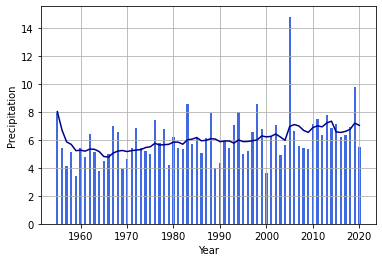

In [33]:
plt.grid()
plt.bar(precipitation.index,precipitation["OVERAL_RAINFALL"],color = 'royalblue', width = 0.5)
plt.plot(precipitation.index,precipitation['rolling'], color = 'darkblue')                             
plt.xlabel("Year")
plt.ylabel("Precipitation")

plt.show()

Looking at the grapgh we can see a tendency towards increased rainfall